In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import numpy as np

In [2]:
X, Y = datasets.load_iris(return_X_y=True)

In [3]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
I12 = (Y == 1) | (Y == 2)
# print(I12)
X12 = X[I12]
Y12 = Y[I12]

In [5]:
np.putmask(Y12, Y12 == 1, 1)
np.putmask(Y12, Y12 == 2, -1)

In [6]:
print(Y12)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [7]:
import mltools.funcs as funcs
import mltools.lossfuncs as lossfuncs
import mltools.models as models
import mltools.gda as gda
import mltools.risks as risks

In [8]:
hinge_func = funcs.Hinge()
loss_func = lossfuncs.MarginLoss(hinge_func)
linmod = models.LinearModel(4, np.random.random(5))
risk = risks.Risk(linmod, loss_func)

In [9]:
gd = gda.GradientDescent(risk, h=0.02)

In [10]:
gd.fit(X12, Y12)

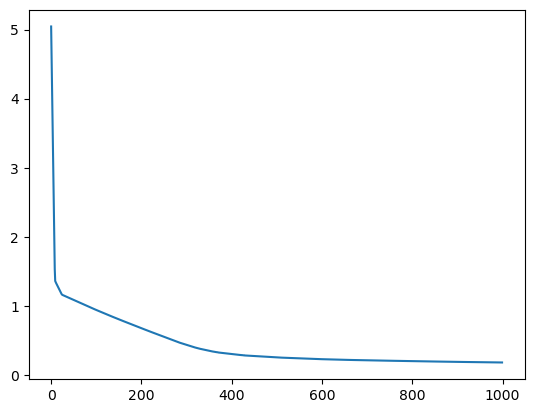

In [11]:
plt.plot(gd.rvals)
plt.show()

In [12]:
import sklearn.metrics as metrics

In [13]:
Y12_p = np.sign(linmod.evaluate_all(X12))

In [14]:
metrics.accuracy_score(Y12_p, Y12)

0.97

In [15]:
N = len(X12)
J12 = np.array([k for k in range(N) if Y12[k] != Y12_p[k]])
XJ12 = X12[J12]
YJ12 = Y12[J12]
print(J12)

[20 22 33]


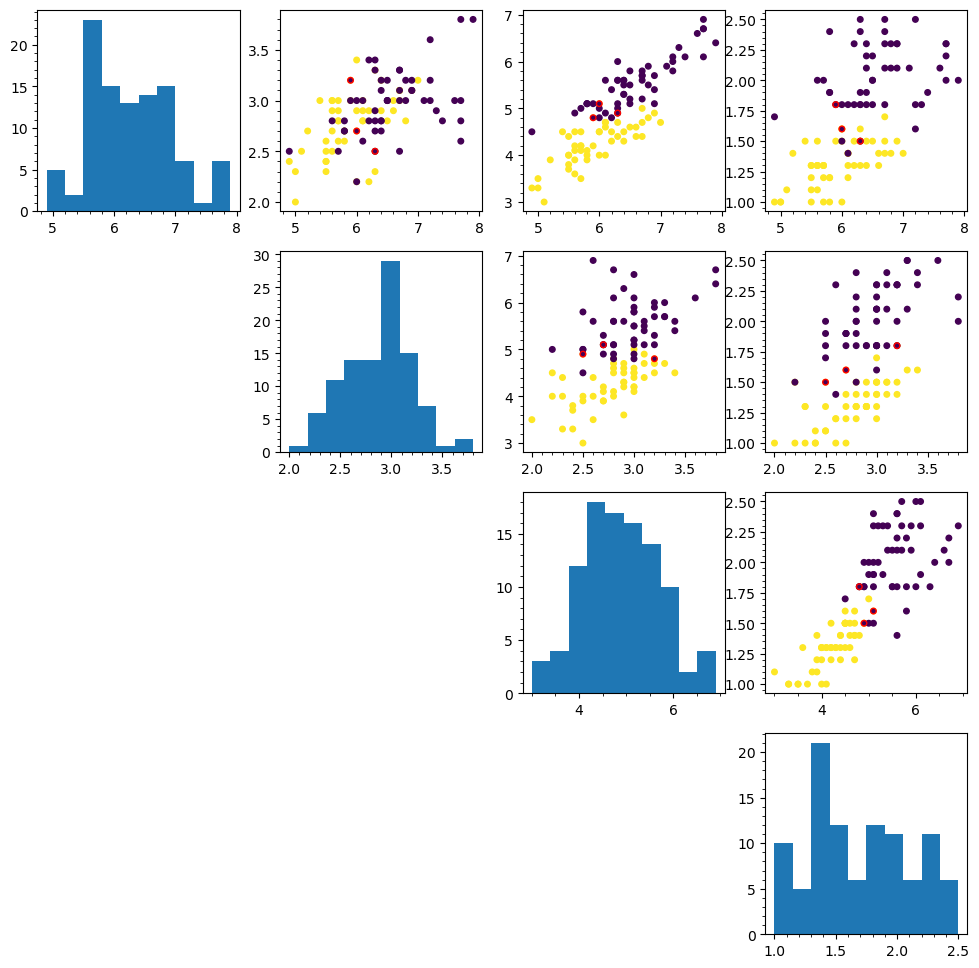

In [16]:
plt.figure(figsize=(12,12))
for i in range(4):
    for j in range(i,4):
        k = 4*i+j+1
        plt.subplot(4, 4, k)
        if i == j:
            plt.hist(X12[:,i])
        else:
            plt.scatter(X12[:,i], X12[:,j], c=Y12, s=16)
            plt.scatter(XJ12[:,i], XJ12[:,j], c=YJ12, s=16, edgecolors='r')
        plt.minorticks_on()
plt.show()